In [1]:
import matplotlib.pyplot as plt
import numpy as np

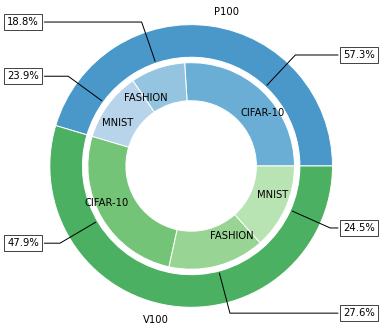

In [2]:
outer_circle_names=["P100","V100",]
outer_circle_size=np.array([436.7,525.5])

inner_circle_names=["CIFAR-10", "FASHION", "MNIST", "CIFAR-10", "FASHION", "MNIST"]
inner_circle_size=np.array([250.2, 82.2,104.3, 251.8, 145.2, 128.5])
inner_circle_percentages = ['57.3%', '18.8%', '23.9%', '47.9%', '27.6%', '24.5%']

# you can see other colormap options from here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
a, b=[plt.cm.Blues,  plt.cm.Greens] 

fig, ax = plt.subplots(figsize=(5,5))
ax.axis('equal')
outer_circle, _ = ax.pie(outer_circle_size, radius=1.3, labels=outer_circle_names, colors=[a(0.6), b(0.6)] )
plt.setp(outer_circle, width=0.30, edgecolor='white')
 
    
inner_circle, _ = ax.pie(inner_circle_size, radius=1.3-0.35, labels=inner_circle_names, labeldistance=0.7, colors=[a(0.5), a(0.40), a(0.30), 
                                                                                                     b(0.5), b(0.40),  b(0.30)])
plt.setp(inner_circle, width=0.35, edgecolor='white')
plt.margins(0,0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=1, va="center")

for i, p in enumerate(inner_circle):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(inner_circle_percentages[i], xy=(x, y), xytext=(1.4*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
plt.show()
#save as pdf >> it is useful to save as pdf when you work with LaTeX
fig.savefig("nested_donut.pdf", bbox_inches='tight')